In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import pickle

In [70]:
#input WGBS file from normal tissue
df = pd.read_csv('/Users/khandekara2/Documents/methylationProject/01_data/Thymus_TP53_cds.bed.tsv', sep='\t')
locations = []
for chrom, start, stop in zip(list(df['chromosome']), list(df['start']), list(df['stop'])):
    locations.append((str(chrom), int(start), int(stop)))
df['location'] = locations
x = np.array([i for i in range(1, df.shape[0] + 1)])
x_labels = sorted(list(set([i[1] for i in df.location]))) #coordinate of cytosine as labels
c = list(df.start)
c = [i for i in c if i in x_labels]
c.sort() # now normal and cancer coordinates are matching
y2 = np.array(df['methylation_ratio']) #methylation ratio from normal tissue 


In [71]:
locations = []
for chrom, start, stop in zip(list(df['chromosome']), list(df['start']), list(df['stop'])):
    locations.append((str(chrom), int(start), int(stop)))
df['location'] = locations
x = np.array([i for i in range(1, df.shape[0] + 1)])
labels = list(set([i[1] for i in df.location])) #coordinate of cytosine as labels
labels.sort()
tss = 7572926 #translation start site of TP53
x_labels = [i - 7572926 for i in labels]

In [72]:
#add mutated sites to profile
mutation_dict = pickle.load(open('/Users/khandekara2/Documents/methylationProject/01_data/mutation_dict_pickles/MALY_mutation_dict.pickle', 'rb'))
mutations = [] #coordinate of mutated site
mut_ratios = [] #methylation ratio of mutated site if available
frequencies = [] #frequency of mutation(# of samples it occurred in)
for loc, sample, ratio in zip(df.location, df.id, df.methylation_ratio):
    if loc in mutation_dict and loc[1] not in mutations:
        if sample in mutation_dict[loc]:
            mut_ratios.append(ratio)
        else:
            mut_ratios.append(1.1)
            
        mutations.append(loc[1])
        frequencies.append(len(mutation_dict[loc]))
        
    loc2 = (loc[0], loc[1] + 1, loc[2] + 1) #take care of the second cytosine in the dyad
    if loc2 in mutation_dict and loc[1] not in mutations:
        if sample in mutation_dict[loc2]:
            mut_ratios.append(ratio)
        else:
            mut_ratios.append(1.1)
        mutations.append(loc[1])
        frequencies.append(len(mutation_dict[loc2]))
               
# mut_ratios = [0.0 for _ in mutations]

#get total number of samples
samples = set([])
for l in mutation_dict.values():
    for sample in l:
        samples.add(sample)
num_samples = len(samples)

[7577119 7577537 7577547]
[1.1, 1.1, 1.1]


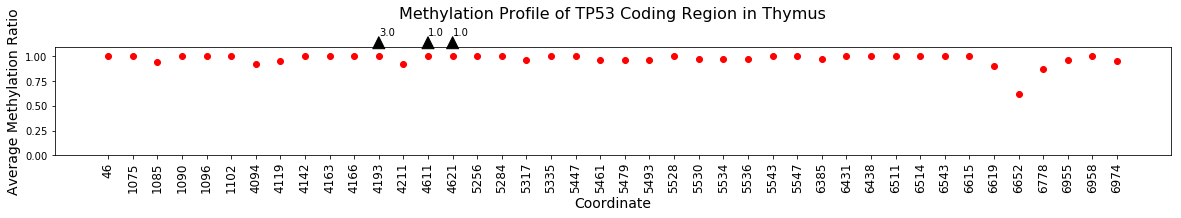

In [73]:
%matplotlib inline
fig = plt.figure(figsize=(20, 2))
ax = fig.add_subplot(111)
ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation='vertical', fontsize=12)
ax.set_ylim((0.0, 1.1))
# ax.errorbar(x, y, yerr=y_err, fmt='o')
ax.set_xlabel('Distance from TSS', fontsize=14)
ax.set_ylabel('Methylation Ratio', fontsize=14)
ax.scatter(x, y2, color='red')
# ax.scatter(np.array(list(mutations)), np.array(mut_ratios), color='green')
trans = ax.get_xaxis_transform()
for u, v, f in zip(mutations, mut_ratios, frequencies):
    ax.annotate(str(round((f / num_samples) * 100, 1)), xy=(labels.index(u) + 1, v), xycoords=trans, arrowprops=dict(facecolor='black', shrink=0.5,))
ttl = ax.title
ttl.set_position([.5, 1.2])
ax.set_title('Methylation Profile of TP53 Coding Region in Thymus', fontsize=16)
# plt.gcf().subplots_adjust(bottom=0.15)
fig.savefig('/Users/khandekara2/Documents/methylationProject/03_results/thymus_methylation_profile.png', bbox_inches='tight')

In [74]:
print (frequencies)

[3, 1, 1]


In [75]:
print (num_samples)

100
